In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style='whitegrid', palette='deep')
import plotly.express as px

In [4]:
#!pip install hydroeval statsmodels plotly

In [5]:
#use spotpy for calval
import spotpy

#use GR4J as python version
import pyGR4J as pG

In [6]:
norderney = pd.read_csv('norderney_daily_16_18.csv',index_col=0)
norderney.index = pd.to_datetime(norderney.index)
#norderney.head()

Q_darcy = pd.read_csv('Q_darcy_m.csv',index_col=0)
Q_darcy.index = pd.to_datetime(Q_darcy.index)
#Q_darcy.resample('1d').sum().head()

In [7]:
norderney

,T,Tmin,Tmax,Prec,Rad,Rs,RH,u2,u2mx,vap,aP,EToPM,EToHG,EToSJ,EToPM2,EToPT
2016-01-01,5.5,1.3,7.7,0.0,324.0,3.24,91.50,3.8,9.7,8.3,1020.75,0.659477,0.363737,0.000000,-0.027534,-0.426829
2016-01-02,2.8,-2.1,4.8,0.5,147.0,1.47,87.71,8.0,19.0,6.6,1012.75,0.608830,0.336546,0.000000,0.733480,0.109121
2016-01-03,-3.0,-3.5,-2.1,3.5,50.0,0.50,90.00,8.9,17.2,4.4,1003.55,0.346146,0.109836,0.000000,0.719102,0.311666
2016-01-04,-4.9,-5.6,-3.4,1.3,158.0,1.58,86.71,7.4,16.0,3.7,991.26,0.415825,0.121097,0.000000,0.557462,0.066327
2016-01-05,-4.7,-5.5,-3.5,2.7,52.0,0.52,88.29,7.7,18.2,3.8,994.19,0.344856,0.118378,0.000000,0.679247,0.288882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-28,6.6,6.0,7.5,0.1,57.0,0.57,96.50,4.3,9.0,9.5,1024.61,0.165477,0.179796,0.335355,0.446398,0.390876
2018-12-29,7.4,6.3,9.0,1.1,54.0,0.54,95.21,8.4,23.8,9.8,1021.53,0.320458,0.250478,0.157501,0.663551,0.410526
2018-12-30,7.0,6.6,7.4,0.1,267.0,2.67,91.79,6.5,18.8,9.2,1026.96,0.665509,0.134990,0.000000,0.262217,-0.275276
2018-12-31,7.3,6.5,8.3,0.2,185.0,1.85,97.38,5.0,13.3,10.0,1028.02,0.305371,0.206300,0.000000,0.131073,0.006289


In [8]:
tsx = pd.concat([norderney.Prec,norderney.EToSJ,1000.*Q_darcy.FBK],axis=1)
tsx.columns = ['Prec','ETact','Qknock']
tsx = pd.concat([tsx,1000.*Q_darcy.resample('1d').sum()],axis=1)
tsx = tsx.dropna()
tsx.head()

,Prec,ETact,Qknock,FBK,KKS,LAR,LW,VBM
2016-01-29,8.3,0.0,0.000000,1.515192,0.544948,5.482211,1.243169,1.360472
2016-01-30,8.5,0.0,0.017389,0.330940,1.591550,12.893762,1.823080,6.642955
2016-01-31,0.8,0.0,0.027462,1.334081,3.216302,6.040211,1.604589,1.941685
2016-02-01,0.3,0.0,0.047850,2.864597,2.325987,7.250653,1.931806,1.259583
2016-02-02,0.0,0.0,0.105840,1.488107,1.634957,5.502493,1.440160,1.015657


In [9]:
#params = [2.40757648942523E+002,-4.80310910679438E-003,4.60127227314395E+000,3.36467040247373E+000,0.9]
params = [100.,-0.101,0.1,5.,1.9]

#set weights of lag function
w1 = pG.tWeightsL1(params[3])
w2 = pG.tWeightsL2(params[3])

Qsim = pG.pyGR4J(tsx.values,params,w1,w2)
Qsim = pd.Series(Qsim,index=tsx.Qknock.index)

In [10]:
px.line(pd.concat([tsx.FBK,Qsim],axis=1,keys= ['OBS', 'SIM']), template='none')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=OBS<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'OBS',
              'line': {'color': '#1F77B4', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'OBS',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 29, 0, 0),
                          datetime.datetime(2016, 1, 30, 0, 0),
                          datetime.datetime(2016, 1, 31, 0, 0), ...,
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1.51519247, 0.33093982, 1.33408137, ..., 0.        , 0.        ,
                          0.        ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=SIM<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'SIM',
              'line': {'color': '#FF7F0E', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'SIM',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 29, 0, 0),
                          datetime.datetime(2016, 1, 30, 0, 0),
                          datetime.datetime(2016, 1, 31, 0, 0), ...,
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([0.00000000e+00, 2.81583134e-13, 9.99897877e-08, ..., 4.93522314e-01,
                          4.51575208e-01, 5.19028147e-01]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [11]:
class spotpy_setup(object):
    def __init__(self):
        self.params = [spotpy.parameter.Uniform('SMA',low=100.0 , high=800.,  optguess=2.40757648942523E+002),   #Capacity of the production soil (SMA) store (mm)
                       spotpy.parameter.Uniform('Wex',low=-0.01 , high=-0.0001,  optguess=-4.80310910679438E-003),#Water exchange coefficient (mm)
                       spotpy.parameter.Uniform('CapR',low=2.0 , high=6., optguess=4.60127227314395E+000), #Capacity of the routing store (mm)
                       spotpy.parameter.Uniform('Ti',low=1.5 , high=7.5, optguess=3.36467040247373E+000), #Time parameter (days) for unit hydrographs
                       spotpy.parameter.Uniform('Spl',low=0.5 , high=0.99, optguess=0.9)
                       ]
        self.evals = tsx.FBK.values
        
    def parameters(self):
        return spotpy.parameter.generate(self.params)
    
    def simulation(self,x):
        #set weights of lag function
        w1 = pG.tWeightsL1(x[3])
        w2 = pG.tWeightsL2(x[3])

        qsim = pG.pyGR4J(tsx.values,x,w1,w2)
        return qsim
    
    def evaluation(self):
        return self.evals
    
    def objectivefunction(self,simulation,evaluation, params=None):
        #try:
        #    like = spotpy.objectivefunctions.kge_non_parametric(evaluation,simulation) 
        #except:
        import hydroeval as he
        like = he.kge(simulation[40:],evaluation[40:])[0][0] #allow for 40 days spin-up
        return like

In [12]:
spot_setup=spotpy_setup()

In [16]:
#test
x = spot_setup.parameters()['random']
simulation = spot_setup.simulation(x)
spot_setup.objectivefunction(simulation,spot_setup.evaluation())

0.19995856802596557

In [17]:
px.line(pd.DataFrame([spot_setup.evaluation(),simulation],index=['OBS', 'SIM'], columns=tsx.index).T, template='none')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=OBS<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'OBS',
              'line': {'color': '#1F77B4', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'OBS',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 29, 0, 0),
                          datetime.datetime(2016, 1, 30, 0, 0),
                          datetime.datetime(2016, 1, 31, 0, 0), ...,
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1.51519247, 0.33093982, 1.33408137, ..., 0.        , 0.        ,
                          0.        ]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=SIM<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'SIM',
              'line': {'color': '#FF7F0E', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'SIM',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2016, 1, 29, 0, 0),
                          datetime.datetime(2016, 1, 30, 0, 0),
                          datetime.datetime(2016, 1, 31, 0, 0), ...,
                          datetime.datetime(2018, 12, 29, 0, 0),
                          datetime.datetime(2018, 12, 30, 0, 0),
                          datetime.datetime(2018, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([0.00000000e+00, 4.27669820e-06, 5.10948304e-05, ..., 2.60560662e-01,
                          2.48098820e-01, 2.64854400e-01]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [18]:
dbname = 'pyGR4J_KKSx'
rep = 100000
dream_sampler = spotpy.algorithms.dream(spot_setup, dbname='DREAM_'+dbname, dbformat='csv')
dream_sampler.sample(rep, nChains=10, convergence_limit=0.05, runs_after_convergence=50)

#sampler=spotpy.algorithms.sceua(spot_setup, dbname='SCE_GR4J', dbformat='csv', alt_objfun=None)


Initializing the  DiffeRential Evolution Adaptive Metropolis (DREAM) algorithm  with  100000  repetitions
The objective function will be maximized
Starting the DREAM algotrithm with 100000 repetitions...
Initialize  10  chain(s)...
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'DREAM_pyGR4J_KKSx.csv' created.
Beginn of Random Walk


/opt/homebrew/lib/python3.11/site-packages/spotpy/algorithms/dream.py:111: RuntimeWarning:

divide by zero encountered in double_scalars



57 of 100000, maximal objective function=0.606878, time remaining: 00:57:55
Acceptance rates [%] =100. 100. 100.  80. 100. 100. 100. 100. 100. 100.
Convergence rates =1.8295 2.1124 1.3814 1.3983 2.9017
126 of 100000, maximal objective function=0.658276, time remaining: 00:52:42
Acceptance rates [%] =100.   100.   100.    91.67 100.   100.    91.67 100.   100.   100.  
Convergence rates =1.7626 1.5266 1.1505 1.3458 1.2928
192 of 100000, maximal objective function=0.658276, time remaining: 00:51:59
Acceptance rates [%] =100.    94.74 100.    94.74 100.   100.    94.74  94.74 100.   100.  
Convergence rates =1.3334 1.1786 1.1693 1.1596 1.2389
261 of 100000, maximal objective function=0.666658, time remaining: 00:51:07
Acceptance rates [%] =100.    96.15 100.    96.15 100.   100.    96.15  96.15 100.   100.  
Convergence rates =1.0917 1.0385 1.2353 1.1058 1.1066
325 of 100000, maximal objective function=0.666658, time remaining: 00:51:22
Acceptance rates [%] =100.    96.97 100.    96.97 10

[array([3.3268086 , 2.11820811, 1.92245145, 1.67482512, 2.95137911]),
 array([2.02699986, 1.68286056, 1.36314262, 1.57193123, 2.06815324]),
 array([2.27358809, 1.60200453, 2.6056339 , 2.80164169, 2.14548855]),
 array([1.77357845, 1.73622164, 1.34492907, 1.54694275, 1.89880257]),
 array([1.8295125 , 2.11238967, 1.38142007, 1.39826272, 2.90172345]),
 array([1.40027571, 1.89412728, 1.4865158 , 1.30791059, 1.91600723]),
 array([1.42793628, 1.83103976, 1.86386521, 1.62999201, 1.53692102]),
 array([1.3081427 , 1.47363668, 1.29514675, 1.44875688, 1.41131598]),
 array([1.43593578, 1.48774016, 1.18785217, 1.38143741, 1.35666642]),
 array([1.47273706, 1.51886652, 1.17844879, 1.31290471, 1.327162  ]),
 array([1.73511623, 1.52573833, 1.18229745, 1.39308626, 1.32300552]),
 array([1.76259837, 1.52661903, 1.15052117, 1.34584913, 1.29275238]),
 array([1.67422768, 1.39427842, 1.21476695, 1.48054817, 1.3488715 ]),
 array([1.49245128, 1.32907815, 1.22274778, 1.32010687, 1.35940986]),
 array([1.39246904, 

In [19]:
import hydroeval as he
from scipy.stats import spearmanr
from scipy.stats import linregress

#dbname = 'pyGR4J_FBK'
eval = tsx.KKS
results = spotpy.analyser.load_csv_results('DREAM_'+dbname)
# Get fields with simulation data
fields = [word for word in results.dtype.names if word.startswith('sim')]
resDF = pd.DataFrame(results)
def eval2(x, y):
    return pd.Series(np.concatenate((linregress(x, y)[:], spearmanr(x, y)[:])),
                     index=['slope', 'intercept', 'rvalue', 'pvalue', 'stderr', 'spearman_corr', 'spearman_p'])
cidx = np.where(resDF.columns.str.contains("simulat"))[0]
resDF['KGE'] = np.nan
resDF['spearman_corr'] = np.nan
resDF['R2'] = np.nan

for i in resDF.index:
    resDF.loc[i, 'spearman_corr'] = eval2(eval.values, resDF.iloc[i, cidx].values)[-2]
    resDF.loc[i, 'R2'] = eval2(eval.values, resDF.iloc[i, cidx].values)[-3] ** 2
    resDF.loc[i, 'KGE'] = he.kge(resDF.iloc[i, cidx].values, eval.values)[0][0]



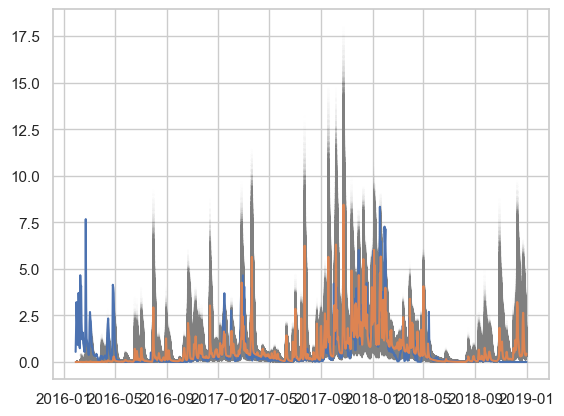

In [20]:
#figsize(15, 4)
#subplot(121)
import matplotlib.pyplot as plt
for i in np.arange(len(resDF)):
    plt.plot(eval.index, resDF.iloc[i, cidx].values, ':', c='gray', alpha=0.006)
plt.plot(eval.index, eval.values, label='Observation')
#plot(eval.index, resDF.iloc[resDF['spearman_corr'].idxmax(), cidx].values, label='max spear')
plt.plot(eval.index, resDF.iloc[resDF['KGE'].idxmax(), cidx].values, label='max KGE')

#plt.plot(eval.index, resDF.iloc[resDF['like1'].idxmax(), cidx].values, label='max like')
#plot(eval.index, resDF.iloc[resDF['like1'].idxmin(), cidx].values, label='max like')
#legend()

#subplot(122)
#sns.distplot(eval.values, label='observed')
# sns.distplot(resDF.iloc[resDF['spearman_corr'].idxmax(),14:-4].values,label='max spear')
# sns.distplot(resDF.iloc[resDF['KGE'].idxmax(),14:-4].values,label='max KGE')

#sns.distplot(resDF.iloc[resDF['like1'].idxmax(), cidx].values, label='max like')
#sns.distplot(resDF.iloc[resDF['like1'].idxmin(), cidx].values, label='max like')
#legend()

In [35]:
px.scatter(resDF.parSMA,resDF.parCapR,color=resDF.like1,template='none')

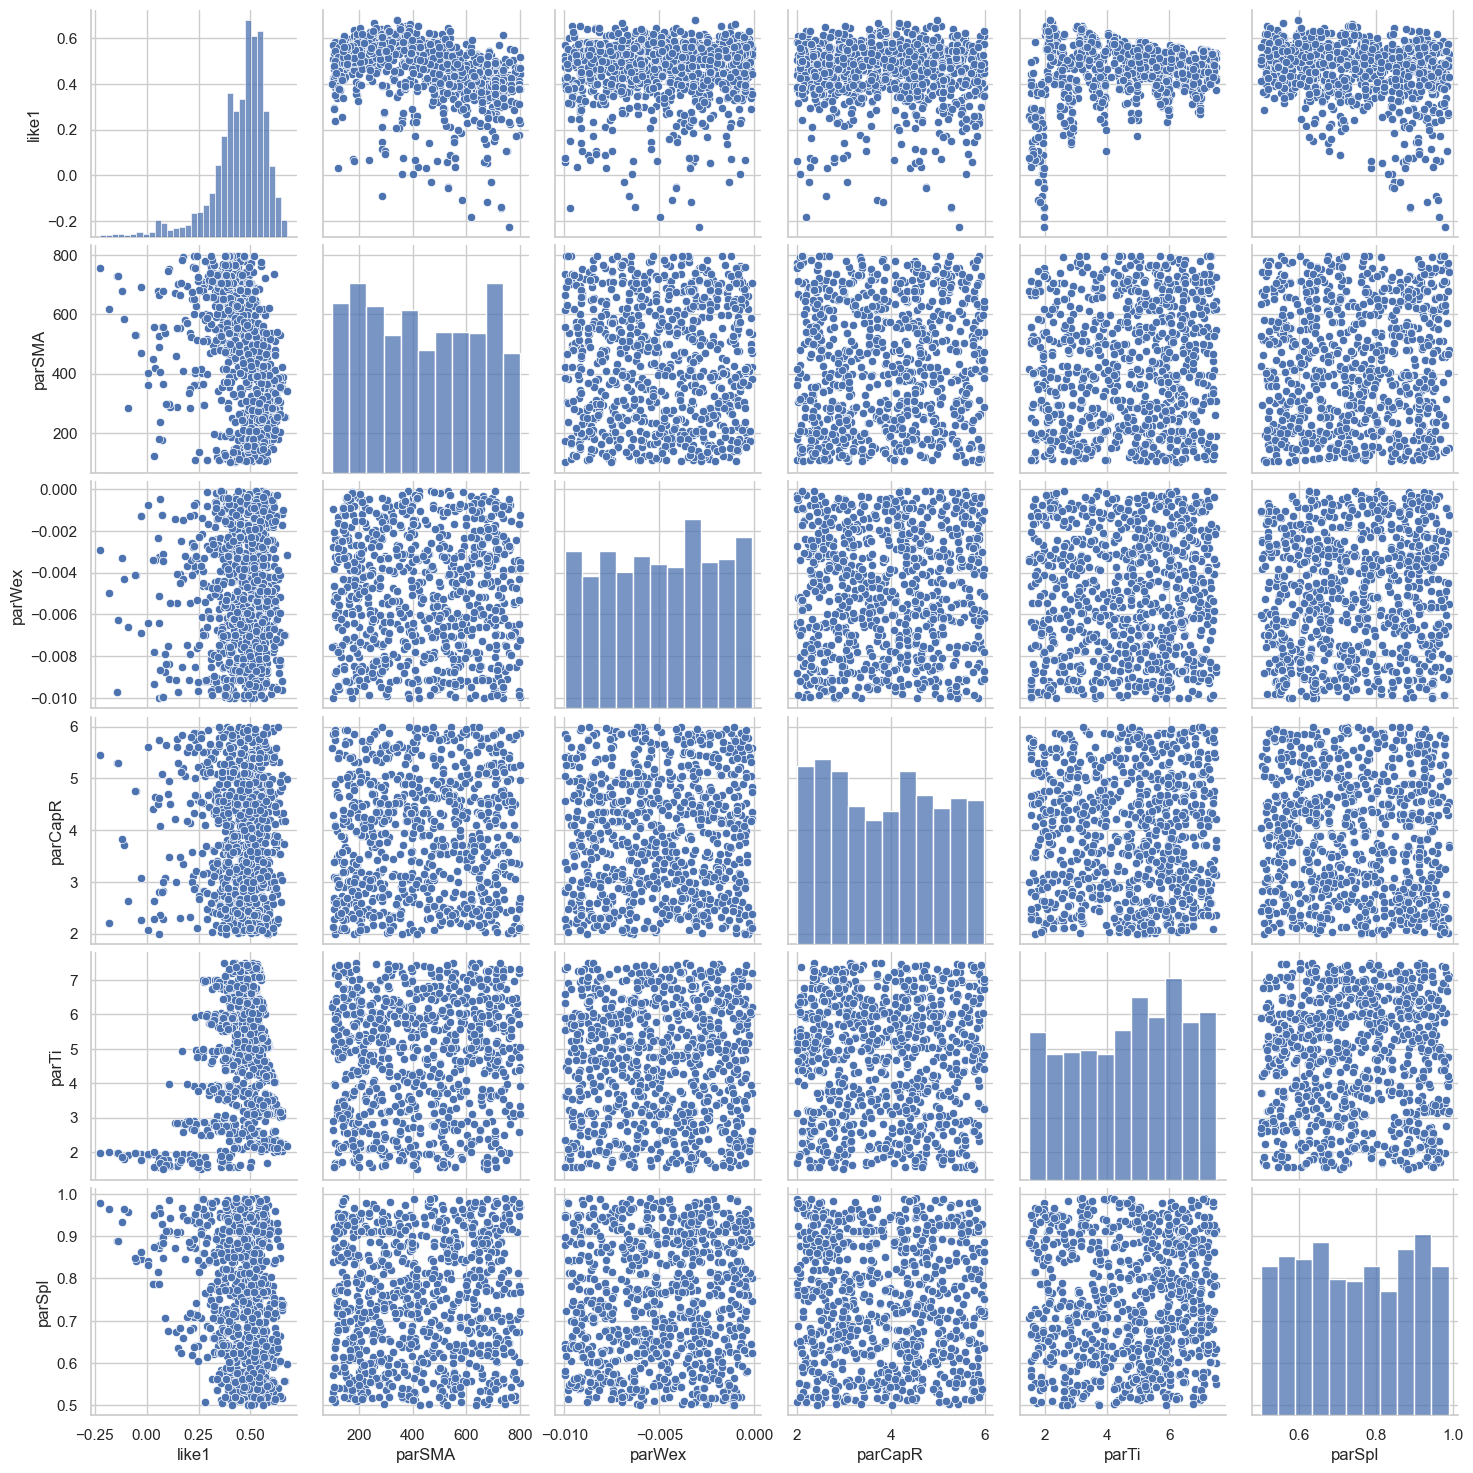

In [43]:
sns.pairplot(resDF[resDF.columns[:6]])


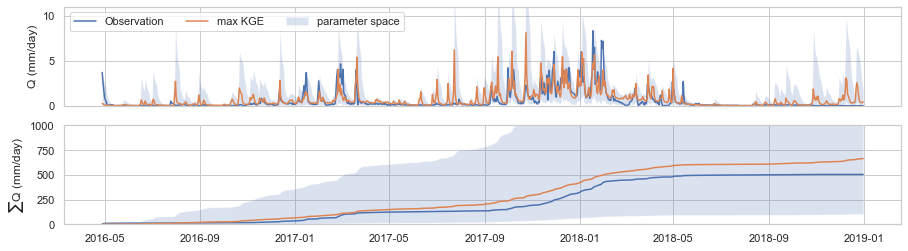

In [18]:
subplot(211)
fill_between(eval.index[90:], (resDF.iloc[:, cidx].min()[90:]), (resDF.iloc[:, cidx].max()[90:]), alpha=0.2,label='parameter space')

plot(eval.index[90:], (eval.values[90:]), label='Observation')
#plot(eval.index[90:], (resDF.iloc[resDF['like1'].idxmax(), cidx].values[90:]), label='max like')
plot(eval.index[90:], (resDF.iloc[resDF['KGE'].idxmax(), cidx].values[90:]), label='max KGE')

legend(ncol=3)
ylim(0,11)
ylabel('Q (mm/day)')
tick_params(labelbottom=False)

subplot(212)
fill_between(eval.index[90:], np.cumsum(resDF.iloc[:, cidx].min()[90:]), np.cumsum(resDF.iloc[:, cidx].max()[90:]), alpha=0.2,label='parameter space')

plot(eval.index[90:], np.cumsum(eval.values[90:]), label='Observation')
#plot(eval.index[90:], np.cumsum(resDF.iloc[resDF['like1'].idxmax(), cidx].values[90:]), label='max like')
plot(eval.index[90:], np.cumsum(resDF.iloc[resDF['KGE'].idxmax(), cidx].values[90:]), label='max KGE')

ylim(0,1000)
ylabel('$\sum$Q (mm/day)')
savefig('GR4J_KKS.pdf',bbox_inches='tight')

In [ ]:
resDF.loc[resDF['KGE']>=resDF['KGE'].quantile(0.999),resDF.columns[0:6]]